In [81]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

In [42]:
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test.csv')

In [43]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [44]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Data visualization

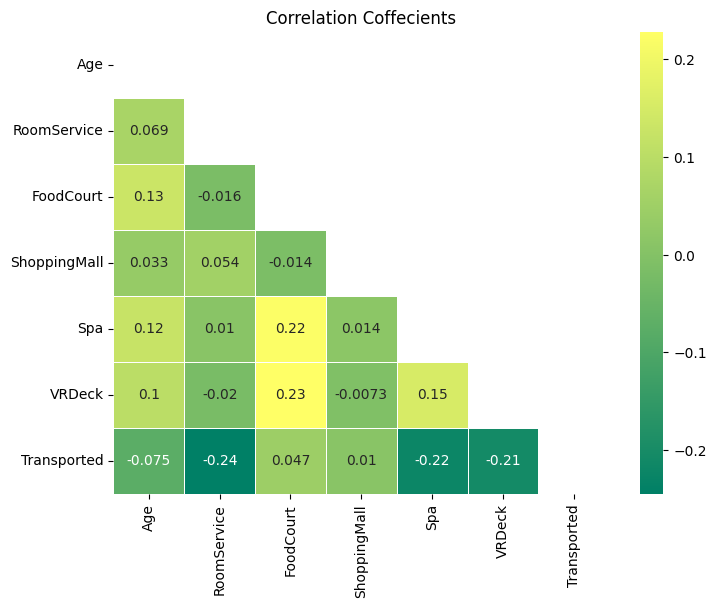

In [45]:
correlation_matrix = train_df.corr(numeric_only = True)
plt.figure(figsize=(8,6))
mask =np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True,cmap="summer",linewidth = 0.5,mask= mask)
plt.title("Correlation Coffecients")
plt.show()


In [46]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()
numeric_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

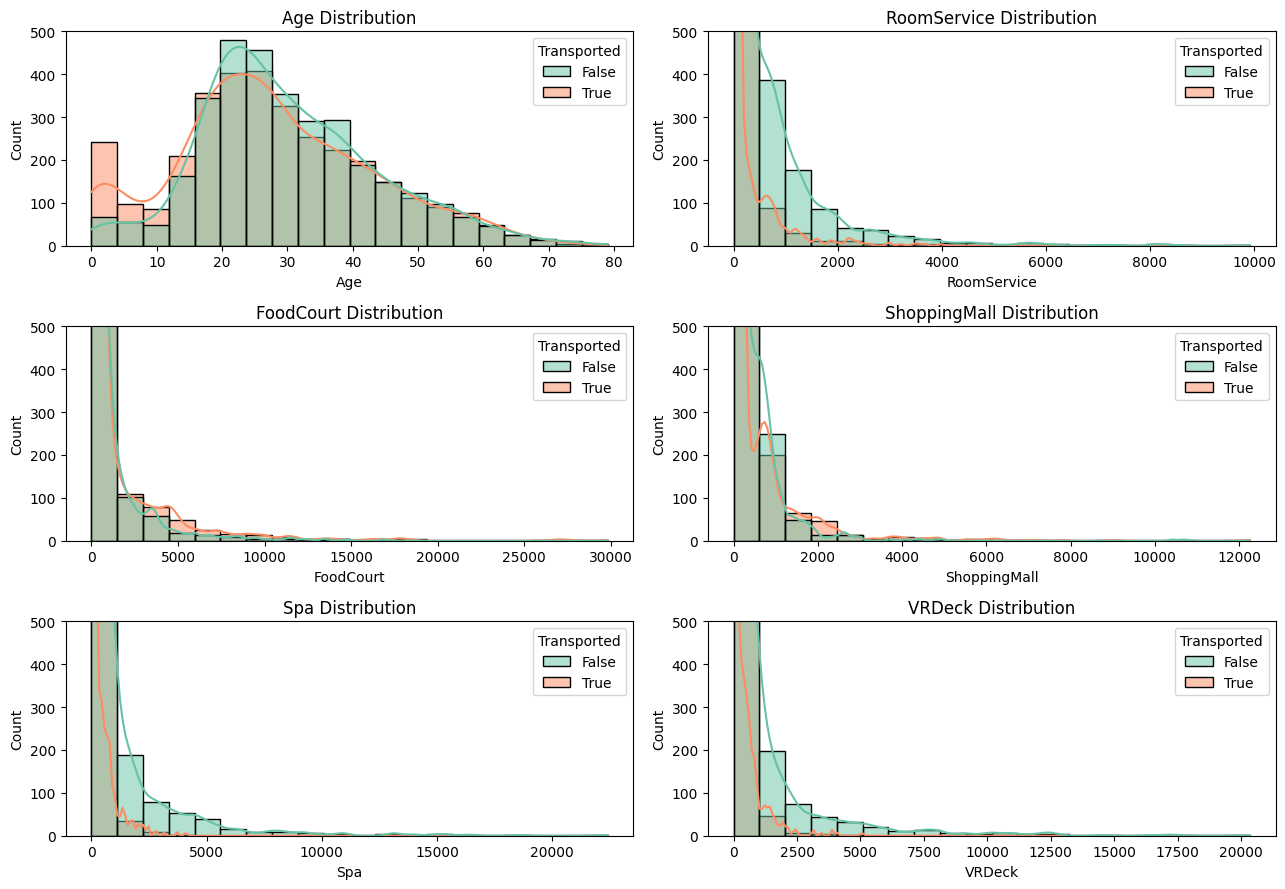

In [47]:
plt.figure(figsize=(13, 9))
for i,c in enumerate(numeric_cols):
    ax=plt.subplot(3,2,i+1)
    sns.histplot(data = train_df.dropna(), x=c,hue="Transported", bins=20, kde=True,palette="Set2",ax=ax)
    plt.title(f"{c} Distribution")
    plt.ylim(0,500)
plt.tight_layout()

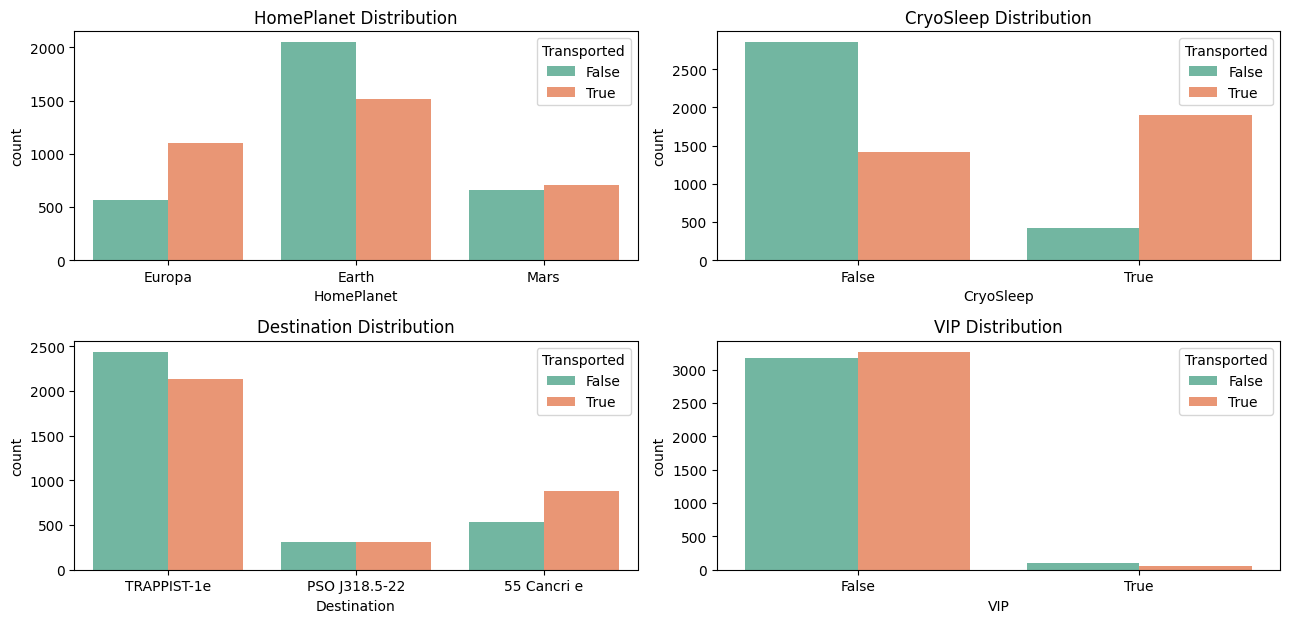

In [48]:
categorical_col =['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Name']
plt.figure(figsize=(13, 9))
for i,c in enumerate(categorical_col[1:-1]):
    ax=plt.subplot(3,2,i+1)
    sns.countplot(data = train_df.dropna(), x=c,hue="Transported",palette="Set2",ax=ax)
    plt.title(f"{c} Distribution")
plt.tight_layout()

Text(0.5, 1.0, 'Age Distribution')

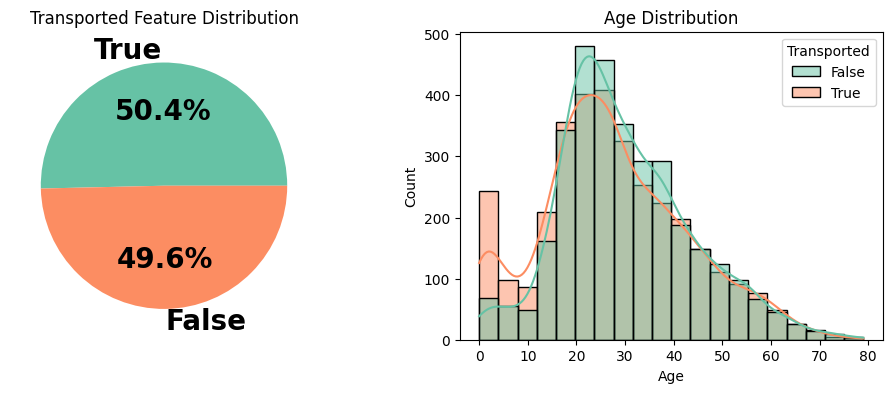

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
    textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported Feature Distribution");

plt.subplot(1,2,2)
sns.histplot(data = train_df.dropna(),x="Age",hue="Transported", bins=20, kde=True,palette="Set2")
plt.title("Age Distribution")

this code provides visualizations to understand the distribution of the "Transported" feature and how it relates to the "Age" feature in the dataset.

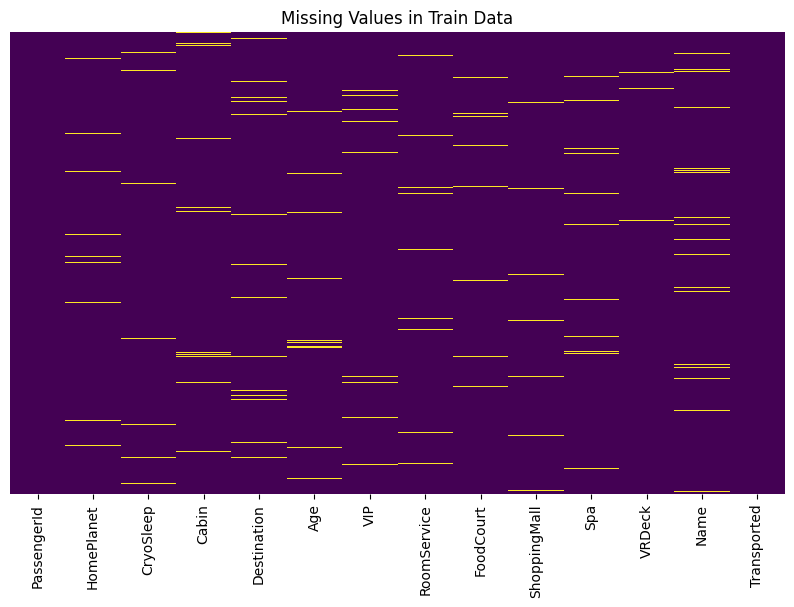

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Train Data')
plt.show()

a heatmap that shows missing values in each column

## Data Preproccesing

In [51]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [52]:
train_df.duplicated().sum()

0

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [54]:
train_df['Transported'] = train_df['Transported'].astype(int)

In [55]:
def create_group_size_feature(df):
    group_counts = df['PassengerId'].apply(lambda x: x.split('_')[0]).value_counts().to_dict()
    df['Group_size'] = df['PassengerId'].apply(lambda x: group_counts[x.split('_')[0]])
    df.set_index('PassengerId', inplace=True)
    return df
    
train_df = create_group_size_feature(train_df)
test_df = create_group_size_feature(test_df)

this code aims to enrich the dataset by adding a new feature 'Group_size' that represents the size of each passenger's group based on their 'PassengerId'. 

In [56]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [57]:
def impute_home_planet(df):
    mode_homeplanet = df['HomePlanet'].mode()[0]
    df['HomePlanet'].fillna(mode_homeplanet, inplace=True)
    df = pd.get_dummies(df, columns=['HomePlanet'], prefix='HomePlanet')
    return df
    
train_df = impute_home_planet(train_df)
test_df = impute_home_planet(test_df)

In [58]:
train_df['CryoSleep'].fillna(train_df['CryoSleep'].median(), inplace=True)
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)

test_df['CryoSleep'].fillna(test_df['CryoSleep'].median(), inplace=True)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

print("Missing values in train dataset:", train_df['CryoSleep'].isnull().sum())
print("Missing values in test dataset:", test_df['CryoSleep'].isnull().sum())

Missing values in train dataset: 0
Missing values in test dataset: 0


this code ensures that missing values in the 'CryoSleep' column are filled with the median and then converts all values to integers. 

In [59]:
train_df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [60]:
def process_cabin_column(df):
    tmp = df['Cabin'].apply(lambda x: x.split('/') if type(x) != float else ['-1', '-1', '-1']).to_list()
    tmp = np.array(tmp)
    df['Cabin_deck'] = tmp[:, 0]
    df['Cabin_num'] = tmp[:, 1]
    df['Cabin_side'] = tmp[:, 2]
    df.drop(columns='Cabin', inplace=True)
    
    return df

train_df = process_cabin_column(train_df)
test_df = process_cabin_column(test_df)

this code aims to preprocess the 'Cabin' column by extracting meaningful features from the cabin information and handling missing values appropriately(deck/num/side)

In [61]:
def fill_missing_cabin_deck(df):
    df['Cabin_deck'].fillna('Unknown', inplace=True)
    df = pd.get_dummies(df, columns=['Cabin_deck'], prefix='Cabin_deck')
    
    return df
train_df = fill_missing_cabin_deck(train_df)
test_df = fill_missing_cabin_deck(test_df)

calculates the mode (most frequent value) of the 'Cabin_deck' column using the mode() method and then replaces missing values with this mode value

In [62]:
def process_cabin_num(df):
    df['Cabin_num'] = df['Cabin_num'].astype(int)
    mean_cabin_num = df.loc[df['Cabin_num'] != -1, 'Cabin_num'].mean()
    df.loc[df['Cabin_num'] == -1, 'Cabin_num'] = int(mean_cabin_num)
    
    return df
train_df = process_cabin_num(train_df)
test_df = process_cabin_num(test_df)

this code aims to preprocess the 'Cabin_num' column by converting its data type to integer and imputing missing values with the mean of non-missing values

In [63]:
def process_cabin_side(df):
    choices = ['S', 'P']
    probabilities = [0.5, 0.5]
    df.loc[df['Cabin_side'] == '-1', 'Cabin_side'] = np.random.choice(choices, sum(df['Cabin_side'] == '-1'), p=probabilities)
    df['Cabin_side'] = df['Cabin_side'].map({'S': 0, 'P': 1})
    return df
    
train_df = process_cabin_side(train_df)
test_df = process_cabin_side(test_df)

this code aims to preprocess the 'Cabin_side' column by handling missing values and encoding categories into numerical values, preparing the data for further analysis or modeling.

In [64]:
def fill_missing_destination(df):
    df['Destination'].fillna('Unknown', inplace=True)
    label_encoder = LabelEncoder()
    df['Destination'] = label_encoder.fit_transform(df['Destination'])
    return df
    
train_df = fill_missing_destination(train_df)
test_df = fill_missing_destination(test_df)

this code aims to impute missing values in the 'Destination' column by randomly selecting destinations from a predefined list, while maintaining the specified probabilities for each destination choice. This approach ensures that missing values are replaced with plausible options, reflecting the distribution of existing destination values in the dataset.

In [65]:
def fill_missing_age(df):
    mode_age = df["Age"].mode()[0]  
    df['Age'].fillna(mode_age, inplace=True)  
    return df
train_df = fill_missing_age(train_df)
test_df = fill_missing_age(test_df)

this part filles the missing values in 'Age' column with the mode of the column. Using the mode preserves the original distribution of ages in the dataset to some extent.  Filling missing values with the mode is a simple and straightforward approach that requires minimal computational effort

In [66]:
def process_vip_column(df):
    df['VIP'].fillna(False, inplace=True)
    df['VIP'] = df['VIP'].astype(int)
    return df
train_df = process_vip_column(train_df)
test_df = process_vip_column(test_df)

this code ensures consistency in the 'VIP' column across the train and test datasets by filling missing values and converting boolean values to integers. 

In [67]:
def preprocess_name_column(df):
    df['Name'].fillna('Unknown Unknown', inplace=True)
    tmp = np.array(df['Name'].apply(lambda x: x if type(x)==float else x.split(' ')).to_list())
    df['Name_first'] = tmp[:, 0]
    df['Name_last'] = tmp[:, 1]
    label_encoder = LabelEncoder()
    df["Name_first"] = label_encoder.fit_transform(df.loc[:, "Name_first"])
    df["Name_last"] = label_encoder.fit_transform(df.loc[:, "Name_last"])
    df.drop(columns="Name", inplace=True)
    return df
    
train_df = preprocess_name_column(train_df)
test_df = preprocess_name_column(test_df)

In [68]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
def fill_missing_with_median(df, cols):
    for col in cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

fill_missing_with_median(train_df, cols)
fill_missing_with_median(test_df, cols)

In [69]:
train_df

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Name_first,Name_last
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,False,False,False,False,1614,1431
0002_01,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,False,False,False,False,False,True,False,False,1407,2110
0003_01,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,True,False,False,False,False,False,False,False,156,1990
0003_02,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,True,False,False,False,False,False,False,False,2276,1990
0004_01,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,False,False,False,False,False,True,False,False,2643,1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,...,True,False,False,False,False,False,False,False,1135,1416
9278_01,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,False,True,False,1492,1341
9279_01,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,...,False,False,False,False,False,False,True,False,955,470


In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CryoSleep          8693 non-null   int32  
 1   Destination        8693 non-null   int32  
 2   Age                8693 non-null   float64
 3   VIP                8693 non-null   int32  
 4   RoomService        8693 non-null   float64
 5   FoodCourt          8693 non-null   float64
 6   ShoppingMall       8693 non-null   float64
 7   Spa                8693 non-null   float64
 8   VRDeck             8693 non-null   float64
 9   Transported        8693 non-null   int32  
 10  Group_size         8693 non-null   int64  
 11  HomePlanet_Earth   8693 non-null   bool   
 12  HomePlanet_Europa  8693 non-null   bool   
 13  HomePlanet_Mars    8693 non-null   bool   
 14  Cabin_num          8693 non-null   int32  
 15  Cabin_side         8693 non-null   int64  
 16  Cabin_deck_-1      8

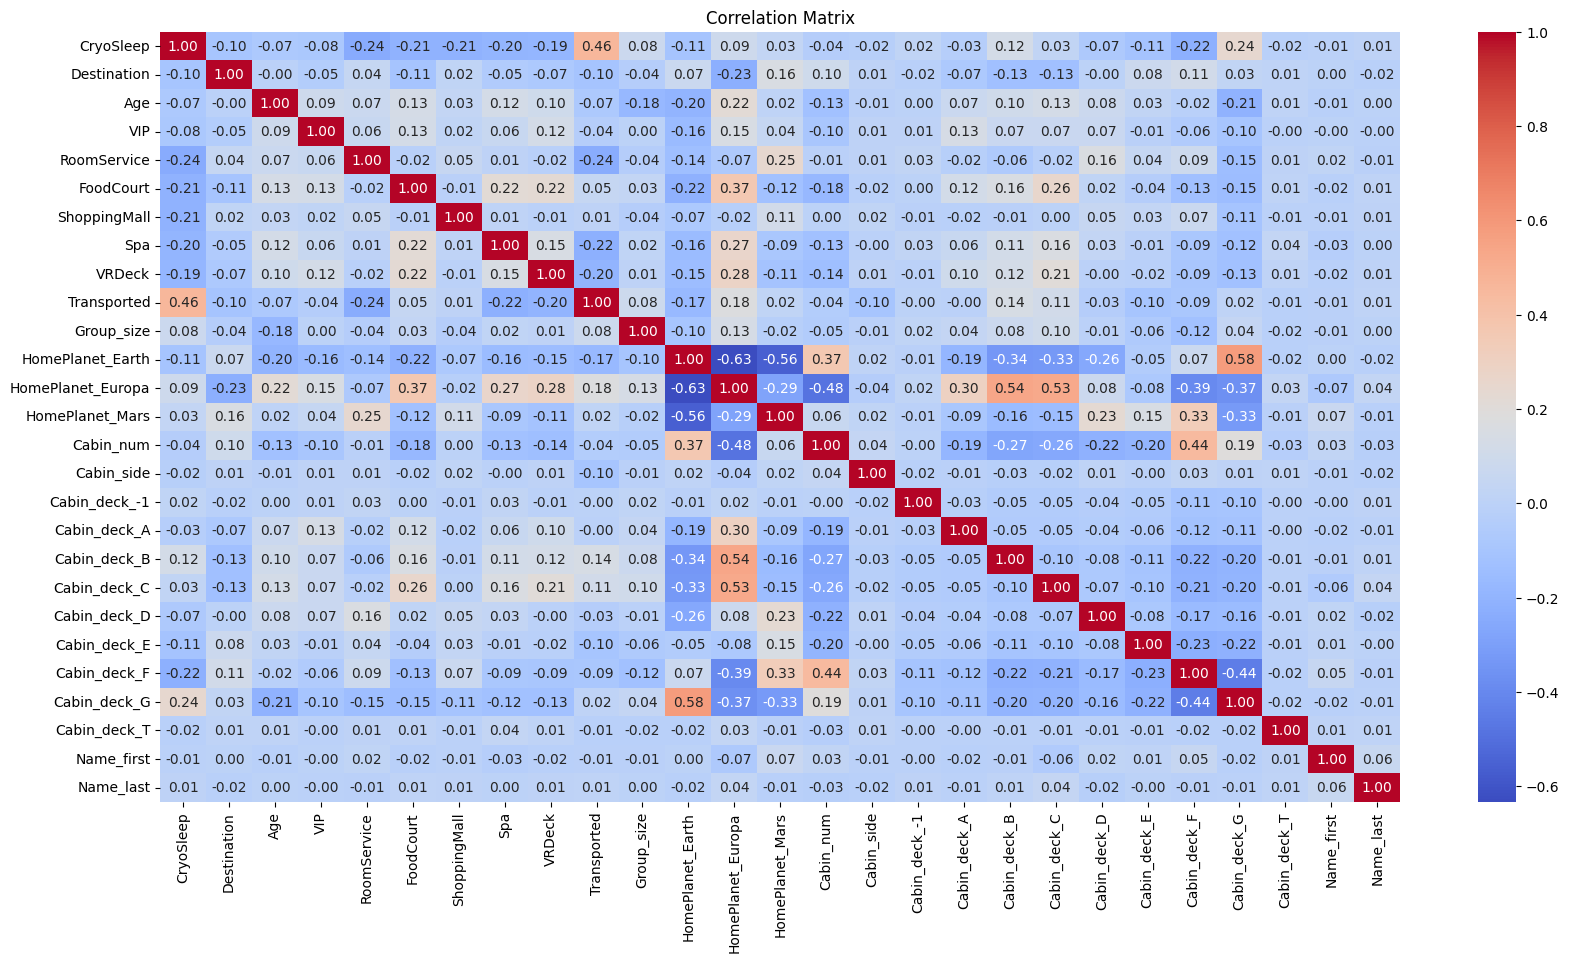

Correlation between Target Variable ('Transported') and each Feature:
CryoSleep            0.460132
Destination         -0.104817
Age                 -0.074153
VIP                 -0.037261
RoomService         -0.241124
FoodCourt            0.045583
ShoppingMall         0.009391
Spa                 -0.218545
VRDeck              -0.204874
Transported          1.000000
Group_size           0.082644
HomePlanet_Earth    -0.168845
HomePlanet_Europa    0.176916
HomePlanet_Mars      0.019544
Cabin_num           -0.044578
Cabin_side          -0.101499
Cabin_deck_-1       -0.000340
Cabin_deck_A        -0.002623
Cabin_deck_B         0.144733
Cabin_deck_C         0.108193
Cabin_deck_D        -0.034046
Cabin_deck_E        -0.097965
Cabin_deck_F        -0.087753
Cabin_deck_G         0.016269
Cabin_deck_T        -0.014568
Name_first          -0.008816
Name_last            0.014441
Name: Transported, dtype: float64


In [88]:
correlation_matrix = train_df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display correlation between target variable and each feature
target_correlation = correlation_matrix['Transported']
print("Correlation between Target Variable ('Transported') and each Feature:")
print(target_correlation)

this is the correlation between the target with each feature

## model

In [84]:
# Separate features and target variable
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

# Logistic Regression
logistic_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model.fit(X_train, y_train)
train_score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)
print("Logistic Regression - Train Accuracy:", train_score)
print("Logistic Regression - Test Accuracy:", test_score)
cv_scores_logistic = cross_val_score(logistic_model, X, y, cv=5)
print("Logistic Regression - Cross-Validation Mean Accuracy:", cv_scores_logistic.mean())

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
train_score_rf = random_forest_model.score(X_train, y_train)
test_score_rf = random_forest_model.score(X_test, y_test)
print("\nRandom Forest - Train Accuracy:", train_score_rf)
print("Random Forest - Test Accuracy:", test_score_rf)
cv_scores_rf = cross_val_score(random_forest_model, X, y, cv=5)
print("Random Forest - Cross-Validation Mean Accuracy:", cv_scores_rf.mean())


Logistic Regression - Train Accuracy: 0.7857348288754673
Logistic Regression - Test Accuracy: 0.7705577918343876
Logistic Regression - Cross-Validation Mean Accuracy: 0.7721147756967849

Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.7929844738355377
Random Forest - Cross-Validation Mean Accuracy: 0.7892608545180588
